In [1]:
#Performing WebScrapping and EDA
#Importing all required libraries
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
driver = webdriver.Chrome()

In [3]:
# List of car brands to scrape
brands = ['tata', 'hyundai', 'honda']

# Initialize lists for combined data
all_company = []
all_car_name = []
all_Km = []
all_fuel_type = []
all_types = []
all_price = []
all_location = []
all_years = []
all_brand = []

In [4]:
def scrape_page(driver):
    cars = driver.find_elements(By.CSS_SELECTOR, 'div._2YB7p')
    for car in cars:
        # Company and car_name
        h3_elements = car.find_elements(By.CSS_SELECTOR, 'h3._11dVb')
        for h3 in h3_elements:
            parts = h3.text.split()
            if len(parts) >= 3:
                all_years.append(parts[0])
                all_company.append(parts[1])
                all_car_name.append(parts[2])
                all_brand.append(brand)

        # Km driven
        ul_elements = car.find_elements(By.CSS_SELECTOR, 'ul._3J2G-')
        for ul in ul_elements:
            li_elements = ul.find_elements(By.TAG_NAME, 'li')
            all_Km.append(li_elements[0].text if len(li_elements) > 0 else None)

        # Fuel type and Transmission type
        if len(li_elements) > 2:
            all_fuel_type.append(li_elements[2].text)
        else:
            all_fuel_type.append(None)
        if len(li_elements) > 4:
            all_types.append(li_elements[4].text)
        else:
            all_types.append(None)

        # Price
        price_elements = car.find_elements(By.CSS_SELECTOR, 'div._2KyOK strong')
        all_price.append(price_elements[0].text if len(price_elements) > 0 else None)

        # Location
        p_elements = car.find_elements(By.CSS_SELECTOR, 'p._3dGMY span')
        location_text = p_elements[1].text if len(p_elements) > 1 else None
        all_location.append('Lucknow' if location_text is None else 'Lucknow')

In [5]:
# Loop through each brand and scrape data from all pages
for brand in brands:
    page = 1
    while True:
        website = f'https://www.cars24.com/buy-used-car?f=make%3A%3D%3A{brand}&sort=bestmatch&serveWarrantyCount=true&gaId=855532033.1722741892&listingSource=TabFilter&storeCityId=290&page={page}'
        driver.get(website)
        
        # Wait for page to load
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, 'div._2YB7p')))
        
        scrape_page(driver)

        # Handle infinite scrolling
        try:
            load_more_button = WebDriverWait(driver, 10).until(
                EC.element_to_be_clickable((By.CSS_SELECTOR, 'button.load-more'))
            )
            load_more_button.click()
            time.sleep(5)  # Wait for new items to load
        except:
            # Break the loop if no more items to load
            break

        # Check if there is a next page (pagination)
        try:
            next_button = driver.find_element(By.CSS_SELECTOR, 'a.next')
            if not next_button.is_displayed():
                break
            page += 1
        except:
            break


In [6]:
driver.quit()

In [7]:
# Handle cases where some lists might be shorter by filling with None
max_length = max(len(all_company), len(all_car_name), len(all_Km), len(all_fuel_type), len(all_types), len(all_price), len(all_location), len(all_years))

all_company += [None] * (max_length - len(all_company))
all_car_name += [None] * (max_length - len(all_car_name))
all_Km += [None] * (max_length - len(all_Km))
all_fuel_type += [None] * (max_length - len(all_fuel_type))
all_types += [None] * (max_length - len(all_types))
all_price += [None] * (max_length - len(all_price))
all_location += [None] * (max_length - len(all_location))
all_years += [None] * (max_length - len(all_years))


In [8]:
# Create DataFrame
data = pd.DataFrame({
    'Year': all_years,
    'Car': all_company,
    'Model': all_car_name,
    'KM Driven': all_Km,
    'Fuel_type': all_fuel_type,
    'Transmission': all_types,
    'Price': all_price,
    'Location': all_location,
    'Brand': all_brand
})

In [9]:
data['Location'] = data['Location'].replace('', 'Lucknow').fillna('Lucknow')


In [10]:
# Verify DataFrame
print(data)

# Save to CSV
data.to_csv('Cars24_Lucknow.csv', index=False)

    Year      Car    Model    KM Driven Fuel_type Transmission        Price  \
0   2023     Tata    Tiago    11,247 KM    PETROL       MANUAL   ₹6.02 Lakh   
1   2021     Tata   ALTROZ    18,868 KM    PETROL       MANUAL   ₹7.74 Lakh   
2   2020     Tata    NEXON    62,576 KM    DIESEL       MANUAL   ₹9.57 Lakh   
3   2020     Tata    Tiago    39,609 KM    PETROL       MANUAL   ₹5.73 Lakh   
4   2019     Tata    Tiago    49,991 KM    PETROL       MANUAL   ₹3.87 Lakh   
5   2022     Tata    PUNCH    34,088 KM    PETROL       MANUAL   ₹6.29 Lakh   
6   2019     Tata  Harrier    35,994 KM    DIESEL       MANUAL  ₹11.44 Lakh   
7   2018     Tata    NEXON    22,507 KM    PETROL       MANUAL   ₹5.39 Lakh   
8   2022     Tata    NEXON    33,391 KM    PETROL    AUTOMATIC   ₹9.27 Lakh   
9   2018  Hyundai      NEW    49,001 KM    PETROL       MANUAL   ₹3.86 Lakh   
10  2016  Hyundai      i10    55,631 KM    PETROL       MANUAL   ₹3.15 Lakh   
11  2019  Hyundai      NEW    53,612 KM    PETROL   

In [11]:
#Performing EDA

df=pd.read_csv('merged_car_details.csv')
print(df.head())
print(df.shape)
print(df.info())
print(df.describe())

   Year      Car                                Model Kilometre Driven  \
0  2012  Hyundai                Hyundai i10 MAGNA 1.1      1,00,144 KM   
1  2013  Hyundai                  Hyundai Eon MAGNA +      1,00,340 KM   
2  2017  Hyundai     Hyundai Verna 1.6 VTVT SX (O) AT      1,01,051 KM   
3  2016  Hyundai  Hyundai Creta SX PLUS AT 1.6 PETROL      1,01,240 KM   
4  2017     Tata                Tata Tiago XTA PETROL      1,02,235 KM   

  Fuel Type Transmission Type   Location      Price  
0    PETROL            MANUAL  New Delhi  1.73 lakh  
1    PETROL            MANUAL  New Delhi  1.94 lakh  
2    PETROL         AUTOMATIC  New Delhi  7.59 lakh  
3    PETROL         AUTOMATIC  New Delhi  7.21 lakh  
4    PETROL         AUTOMATIC  New Delhi  3.84 lakh  
(1246, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year            

In [12]:
df.isnull().sum()

Year                 0
Car                  0
Model                0
Kilometre Driven     0
Fuel Type            0
Transmission Type    0
Location             0
Price                0
dtype: int64

In [13]:
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['number']).columns
print(categorical_cols)
print(numerical_cols)
location_summary = df.groupby('Location').describe()
print(location_summary)

Index(['Car', 'Model', 'Kilometre Driven', 'Fuel Type', 'Transmission Type',
       'Location', 'Price'],
      dtype='object')
Index(['Year'], dtype='object')
            Year                                                          \
           count         mean       std     min      25%     50%     75%   
Location                                                                   
Bangalore  528.0  2017.363636  3.034958  2010.0  2015.00  2017.0  2020.0   
Gurgaon    220.0  2017.300000  3.112942  2009.0  2015.00  2017.0  2020.0   
Indore      20.0  2017.000000  2.790963  2013.0  2014.75  2017.5  2019.0   
Lucknow     45.0  2018.066667  2.553073  2012.0  2016.00  2018.0  2020.0   
Nagpur      29.0  2017.482759  1.805165  2013.0  2016.00  2018.0  2019.0   
New Delhi  404.0  2017.665842  3.266450  2010.0  2015.00  2018.0  2020.0   

                   
              max  
Location           
Bangalore  2023.0  
Gurgaon    2026.0  
Indore     2022.0  
Lucknow    2023.0  
Nagpur     2021

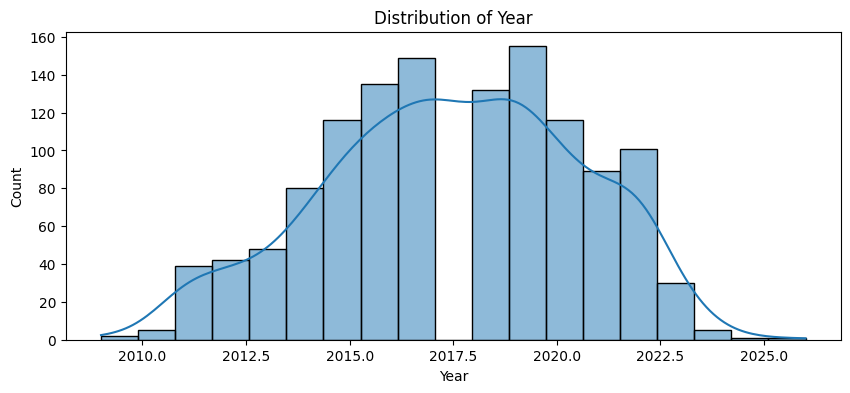

In [14]:
#univariate analysis
# Distribution of Year
plt.figure(figsize=(10, 4))
sns.histplot(df['Year'], kde=True)
plt.title('Distribution of Year')
plt.show()

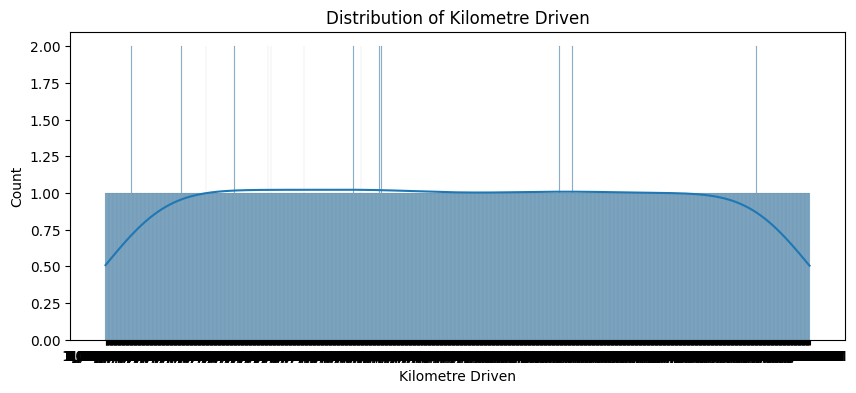

In [15]:
# Distribution of Kilometre Driven
plt.figure(figsize=(10, 4))
sns.histplot(df['Kilometre Driven'], kde=True)
plt.title('Distribution of Kilometre Driven')
plt.show()

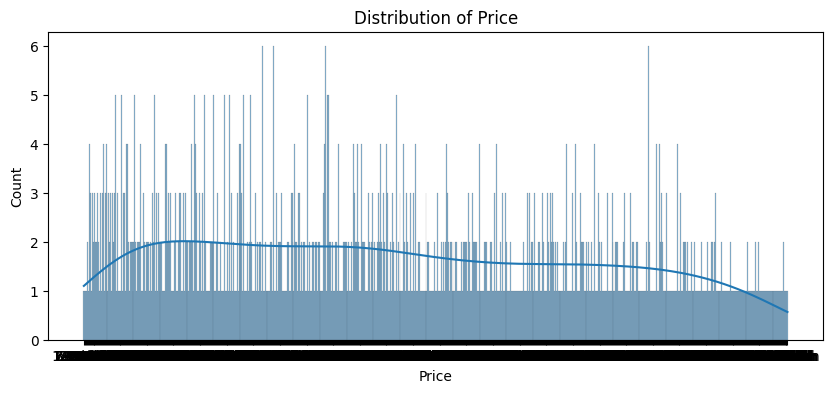

In [16]:
# Distribution of Price
plt.figure(figsize=(10, 4))
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Price')
plt.show()

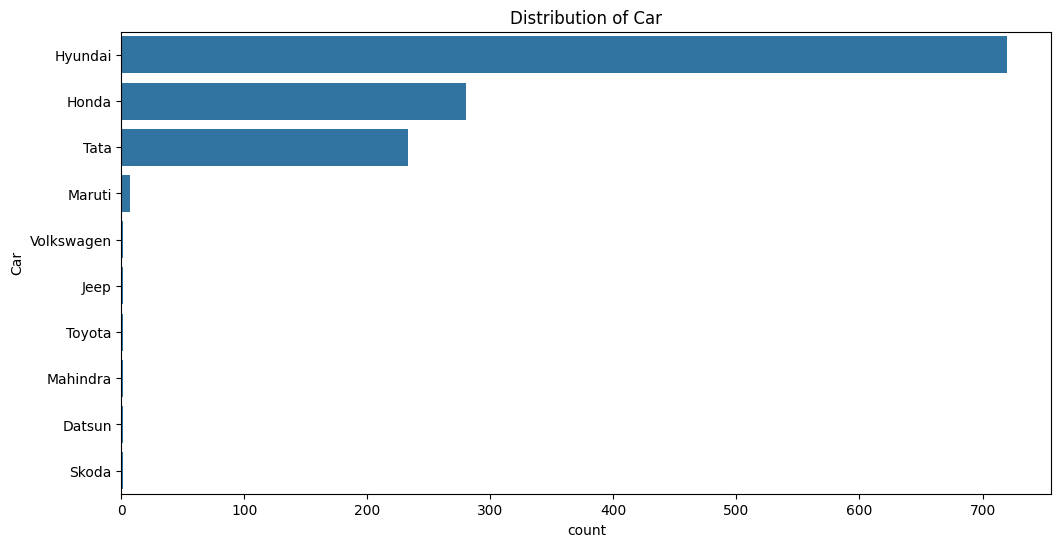

In [17]:
#distribution of categorical features
# Count plot for Car
plt.figure(figsize=(12, 6))
sns.countplot(y='Car', data=df, order=df['Car'].value_counts().index)
plt.title('Distribution of Car')
plt.show()

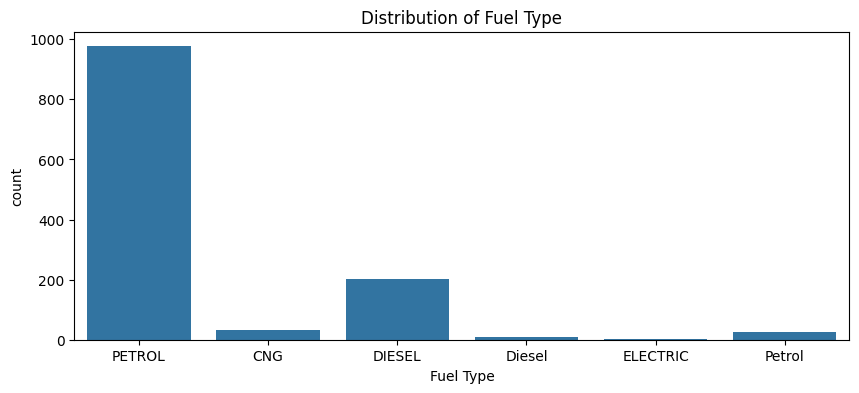

In [18]:
# Count plot for Fuel Type
plt.figure(figsize=(10, 4))
sns.countplot(x='Fuel Type', data=df)
plt.title('Distribution of Fuel Type')
plt.show()

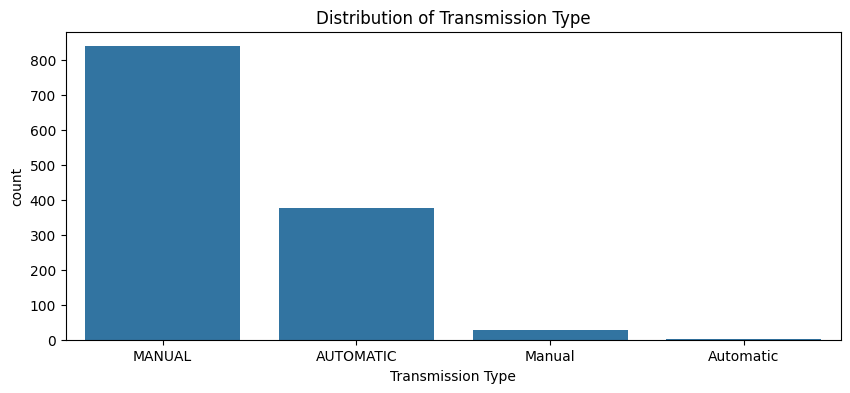

In [19]:
# Count plot for Transmission Type
plt.figure(figsize=(10, 4))
sns.countplot(x='Transmission Type', data=df)
plt.title('Distribution of Transmission Type')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

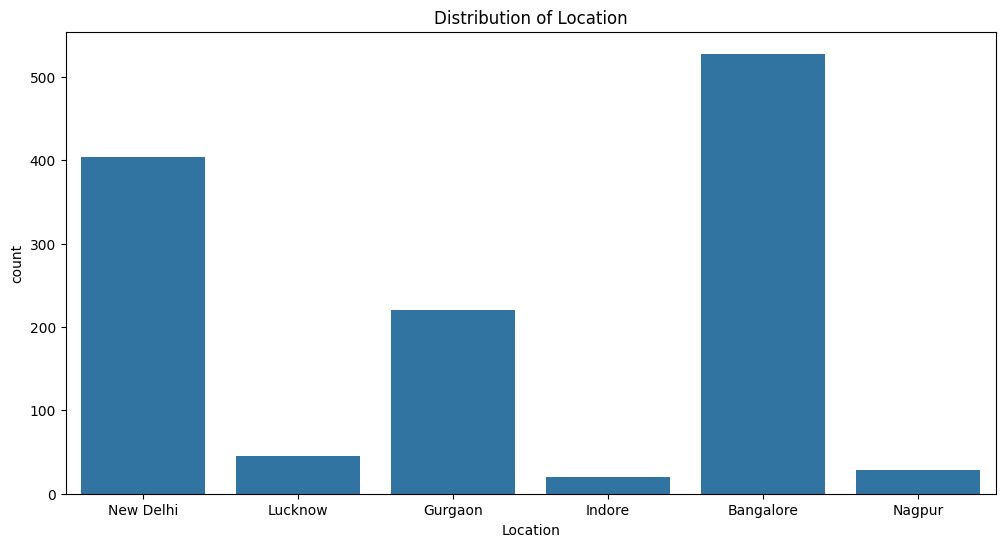

In [20]:
# Count plot for Location
plt.figure(figsize=(12, 6))
sns.countplot(x='Location', data=df)
plt.title('Distribution of Location')
plt.show

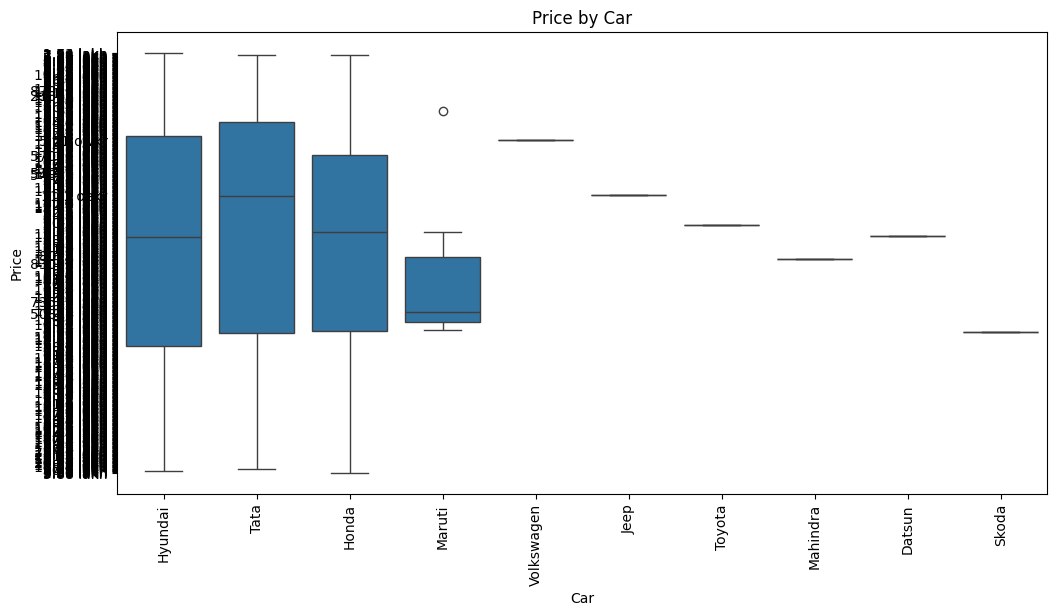

In [21]:
#Bivariate analysis
# Boxplot of Price by Car
plt.figure(figsize=(12, 6))
sns.boxplot(x='Car', y='Price', data=df)
plt.title('Price by Car')
plt.xticks(rotation=90)
plt.show()

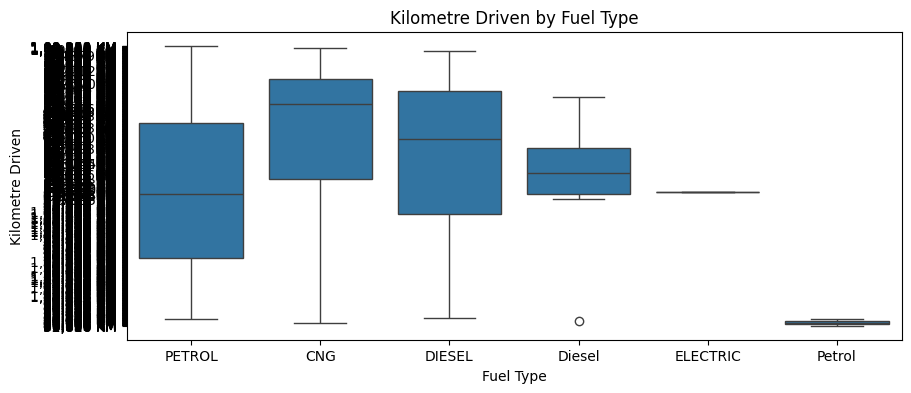

In [22]:
# Boxplot of Kilometre Driven by Fuel Type
plt.figure(figsize=(10, 4))
sns.boxplot(x='Fuel Type', y='Kilometre Driven', data=df)
plt.title('Kilometre Driven by Fuel Type')
plt.show()


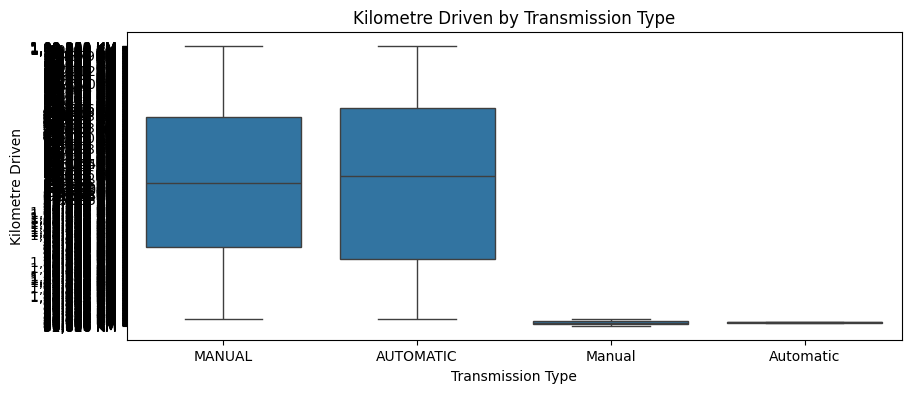

In [23]:
# Boxplot of Kilometre Driven by Transmission Type
plt.figure(figsize=(10, 4))
sns.boxplot(x='Transmission Type', y='Kilometre Driven', data=df)
plt.title('Kilometre Driven by Transmission Type')
plt.show()

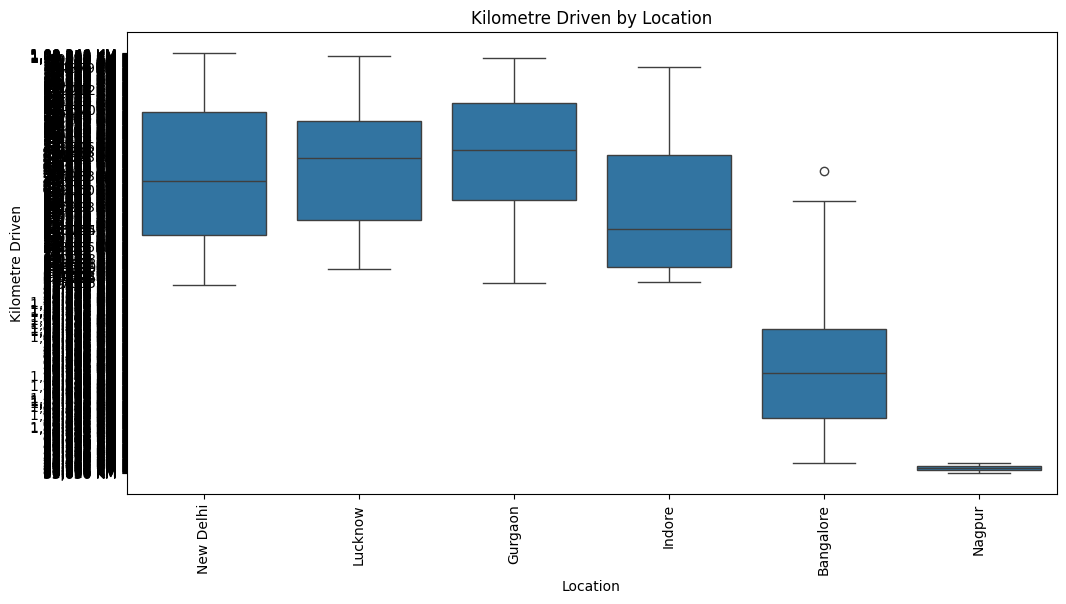

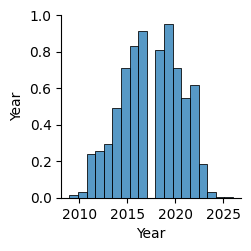

In [27]:
# Boxplot of Kilometre Driven by Location
plt.figure(figsize=(12, 6))
sns.boxplot(x='Location', y='Kilometre Driven', data=df)
plt.title('Kilometre Driven by Location')
plt.xticks(rotation=90)
plt.show()
sns.pairplot(df[['Year', 'Kilometre Driven', 'Price']])
plt.show()